In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd
df = pd.read_csv("datos/pesos.csv")

In [6]:
X = df.height.values

In [7]:
Y = df.weight.values

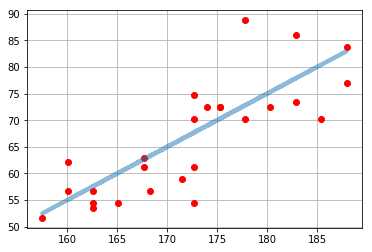

In [8]:
plot(X, Y, 'or')
plot(X, -105 + X, lw=4, alpha=0.5)
grid()

In [9]:
def funcs(N=10, sigma=0.5, seed=1):
    X = np.linspace(-5, 5, N)
    Y = 2 + X + np.random.normal(seed, sigma, N)
    return X, Y

In [10]:
x, y = funcs()

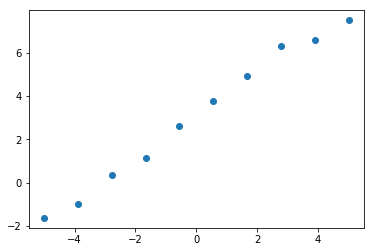

In [11]:
plot(x,y,'o')

## Para regresion lineal
Ajuste de una recta a un conjunto de puntos con tendencia lineal

In [12]:
from sklearn import linear_model
estimator = linear_model.LinearRegression()

In [13]:
model = estimator.fit(x.reshape(-1,1), y)

In [14]:
print(model.coef_)
print(model.intercept_)

[ 0.96720038]
3.06141694654


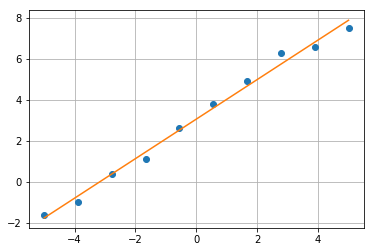

In [15]:
plot(x,y, 'o')
plot(x,model.intercept_ + model.coef_*x)
grid()

In [16]:
model.intercept_ + model.coef_* 0

array([ 3.06141695])

## Usando datos reales

In [17]:
X = df.height.values
Y = df.weight.values

In [18]:
model = estimator.fit(X.reshape(-1,1), Y)

Intercept: -102.50630406775632	coeff: [ 0.9799446]


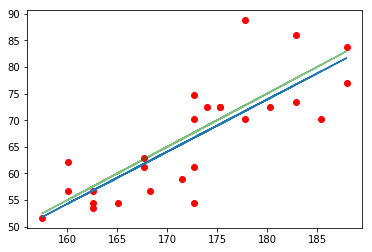

In [19]:
plot(X, Y, 'or')
plot(X, model.intercept_ + model.coef_*X)
plot(X, -105 + X, 'g', alpha=0.5)
print('Intercept: {0}\tcoeff: {1}'.format(model.intercept_, model.coef_))

In [20]:
yn = model.intercept_ + model.coef_*200

In [21]:
yn

array([ 93.48261614])

## función score

In [22]:
def r_det(Y, Ypred):
    U = np.sum((Y-Ypred)**2)
    V = np.sum((Y-Ypred.mean())**2)
    return 1-(U/V)

In [23]:
Y_pred = model.predict(X.reshape(-1,1))

In [24]:
print(r_det(Y, Y_pred))

0.65424494165


In [26]:
print(np.corrcoef(Y, Y_pred)[0,1])

0.808854091694


In [27]:
print(model.score(X.reshape(-1,1), Y))

0.65424494165


## Efecto del ruido y $R^2$

In [29]:
def funcsr(N=100, sigma=0.5, seed=1):
    X = np.linspace(-5, 5, N)
    Y = 2 + X + np.random.normal(seed, sigma, N)
    estimator = linear_model.LinearRegression()
    model = estimator.fit(X.reshape(-1,1), Y)
    r2 = model.score(X.reshape(-1, 1), Y)
    return r2

In [30]:
r2s05 = np.zeros((1000,))
r2s1000= np.zeros((1000,))
for i in range(1000):
    r2s05[i] = funcsr()
    r2s1000[i] = funcsr(sigma=1)

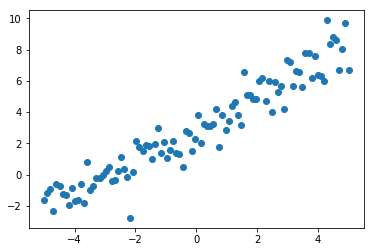

In [31]:
X = np.linspace(-5, 5, 100)
plot(X, 2 + X + np.random.normal(1, 1, 100), 'o')

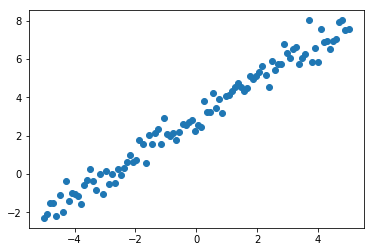

In [32]:
X = np.linspace(-5, 5, 100)
plot(X, 2 + X + np.random.normal(1, 0.5, 100),'o')

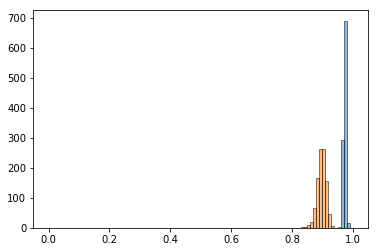

In [33]:
bins = linspace(0,1,100)
_ = hist(r2s05, ec='k', alpha=0.5, bins=bins)
_ = hist(r2s1000, ec='k', alpha=0.5, bins=bins)

## Polinomios

In [34]:
def poli(N=10, sigma=3):
    X = np.linspace(-5, 5, N)
    epsilon = np.random.normal(size=N, scale=sigma)
    Y = 1 + X - (X**2) + epsilon
    return X, Y

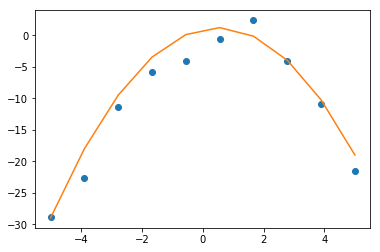

In [35]:
X, Y = poli()
X = X.reshape(-1, 1)
plot(X, Y, 'o')
plot(X, 1 + X - (X**2))

### Usando Scikit-learn

In [36]:
X, Y = poli()
X = X.reshape(-1, 1)

In [37]:
from sklearn import linear_model
estimator = linear_model.LinearRegression()
model = estimator.fit(X, Y)
print('m={0}  b={1}'.format(model.coef_[0], model.intercept_))
print(model.score(X,Y))

m=0.48995453206503814  b=-10.408922092375722
0.0337558262119


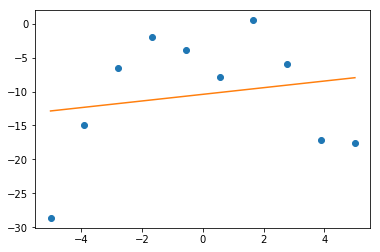

In [38]:
plot(X, Y, "o")
plot(X, model.coef_[0] * X + model.intercept_)

### Usando polynomialfeatures

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [40]:
degree = 5
model = make_pipeline(PolynomialFeatures(degree),
                      linear_model.LinearRegression())
model.fit(X, Y)
model.score(X, Y)

0.89744302985773428

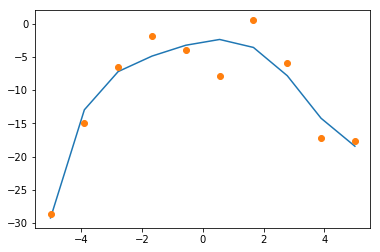

In [41]:
plot(X, model.predict(X))
plot(X, Y, 'o')

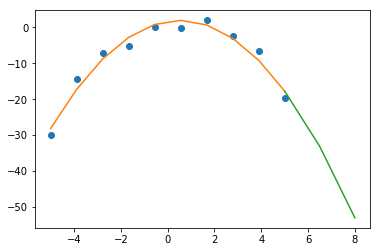

In [42]:
X, Y = poli()
degree = 2
model = make_pipeline(PolynomialFeatures(degree),
                      linear_model.LinearRegression())
model.fit(X.reshape(-1,1), Y)
plot(X, Y, 'o')
plot(X, model.predict(X.reshape(-1, 1)))
X_new = np.linspace(5, 8, 3).reshape(-1, 1)
Y_new = model.predict(X_new)
plot(X_new, Y_new)

## overfitting

(0.8, 1)

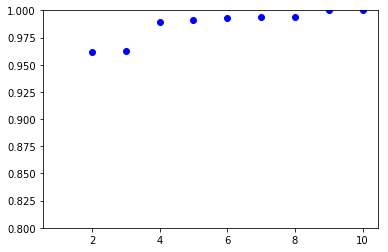

In [43]:
for degree in range(1, 11):
    model = make_pipeline(PolynomialFeatures(degree),
                          linear_model.LinearRegression())
    model.fit(X.reshape(-1,1), Y)
    score = model.score(X.reshape(-1,1), Y)
    plot(degree, score, 'ob')
ylim([0.8,1])

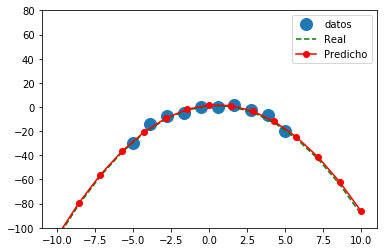

In [46]:
degree = [2, 3, 4]
model = make_pipeline(PolynomialFeatures(degree[0]),
                      linear_model.LinearRegression())
model.fit(X.reshape(-1,1), Y)
plot(X, Y, 'o', label='datos', markersize=12)
newX = np.linspace(-10, 10, 15).reshape(-1, 1)
plot(newX, 1 + newX - newX**2, 'g--', label='Real')
plot(newX, model.predict(newX), 'or-', label='Predicho')
ylim([-100,80])
legend(fontsize=10)